# **Car-Engine-Health-Prediction-Project-Group3-Karu**

## **1. Business Understanding**<hr>

### **Problem Statement**

There have been recent concerns in engine reliability and also the reliability of cars in general. Some attribute this to tighter emissions regulations leading car manufactures to trade long- term reliability for lower emissions. We have identified a need for a tool to help drivers judge the status of the engine specifically given engine data such as oil pressure, temperature etc.

### **Objectives**

* Find the best model that predicts engine faliure.
* Try to minimise false positives since they are costlier.

<br><br>

## **2. Data Understanding**<hr>

### **2.1. Imports & Data Loading**

In [2]:
import numpy as np
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix,roc_auc_score,roc_curve)

In [3]:
#Data file paths
train_path = "./data/train.csv"
test_path = "./data/test.csv"
raw_path = "./data/raw_data.csv"

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)
raw_df = pd.read_csv(raw_path)

In [4]:
raw_df.head()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
0,700,2.493592,11.790927,3.178981,84.144163,81.632187,1
1,876,2.941606,16.193866,2.464504,77.640934,82.445724,0
2,520,2.961746,6.553147,1.064347,77.752266,79.645777,1
3,473,3.707835,19.510172,3.727455,74.129907,71.774629,1
4,619,5.672919,15.738871,2.052251,78.396989,87.000225,0


In [5]:
train_df.head()

,engine_rpm,lub_oil_pressure,fuel_pressure,coolant_pressure,lub_oil_temp,coolant_temp,engine_condition
0,496,4.706240,5.249898,3.803385,75.033607,70.542095,0
1,836,3.960027,4.928546,3.705357,74.395016,84.098307,1
2,623,3.055244,9.494612,2.084725,76.865701,72.927688,0
3,675,2.785797,5.463947,1.649817,75.397279,82.907453,1
4,1412,2.816022,4.001410,1.921522,83.246013,71.176927,1


In [6]:
test_df.head()

,engine_rpm,lub_oil_pressure,fuel_pressure,coolant_pressure,lub_oil_temp,coolant_temp,engine_condition
0,634,2.611260,10.453517,2.771041,75.863640,79.245834,1
1,856,4.043840,5.829366,2.460446,73.860133,71.047078,1
2,814,4.073486,5.257120,1.866571,81.840070,76.715591,0
3,379,2.724639,4.712955,1.981593,77.092260,76.106727,1
4,868,2.672809,5.273917,1.905387,78.475478,72.088361,0


### **2.2. Cleaning**

#### *raw_df*

In [7]:
raw_df.isnull().sum()

Engine rpm          0
Lub oil pressure    0
Fuel pressure       0
Coolant pressure    0
lub oil temp        0
Coolant temp        0
Engine Condition    0
dtype: int64

In [8]:
raw_df.duplicated().sum()

np.int64(0)

In [9]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19535 entries, 0 to 19534
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Engine rpm        19535 non-null  int64  
 1   Lub oil pressure  19535 non-null  float64
 2   Fuel pressure     19535 non-null  float64
 3   Coolant pressure  19535 non-null  float64
 4   lub oil temp      19535 non-null  float64
 5   Coolant temp      19535 non-null  float64
 6   Engine Condition  19535 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 1.0 MB


In [10]:
raw_df.describe()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
count,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000
mean,791.239263,3.303775,6.655615,2.335369,77.643420,78.427433,0.630509
std,267.611193,1.021643,2.761021,1.036382,3.110984,6.206749,0.482679
min,61.000000,0.003384,0.003187,0.002483,71.321974,61.673325,0.000000
25%,593.000000,2.518815,4.916886,1.600466,75.725990,73.895421,0.000000
50%,746.000000,3.162035,6.201720,2.166883,76.817350,78.346662,1.000000
75%,934.000000,4.055272,7.744973,2.848840,78.071691,82.915411,1.000000
max,2239.000000,7.265566,21.138326,7.478505,89.580796,195.527912,1.000000


#### *test_df*

In [15]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3907 entries, 0 to 3906
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   engine_rpm        3907 non-null   int64  
 1   lub_oil_pressure  3907 non-null   float64
 2   fuel_pressure     3907 non-null   float64
 3   coolant_pressure  3907 non-null   float64
 4   lub_oil_temp      3907 non-null   float64
 5   coolant_temp      3907 non-null   float64
 6   engine_condition  3907 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 213.8 KB


In [16]:
test_df.duplicated().sum()

np.int64(0)

This dataset is clean

#### *train_df*

In [18]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15628 entries, 0 to 15627
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   engine_rpm        15628 non-null  int64  
 1   lub_oil_pressure  15628 non-null  float64
 2   fuel_pressure     15628 non-null  float64
 3   coolant_pressure  15628 non-null  float64
 4   lub_oil_temp      15628 non-null  float64
 5   coolant_temp      15628 non-null  float64
 6   engine_condition  15628 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 854.8 KB


In [17]:
train_df.duplicated().sum()

np.int64(0)

This dataset is clean

### **2.3. Visulizations & Analysis**

In [19]:
raw_df['Engine Condition'].value_counts()
raw_df['Engine Condition'].value_counts(normalize=True)

Engine Condition
1    0.630509
0    0.369491
Name: proportion, dtype: float64

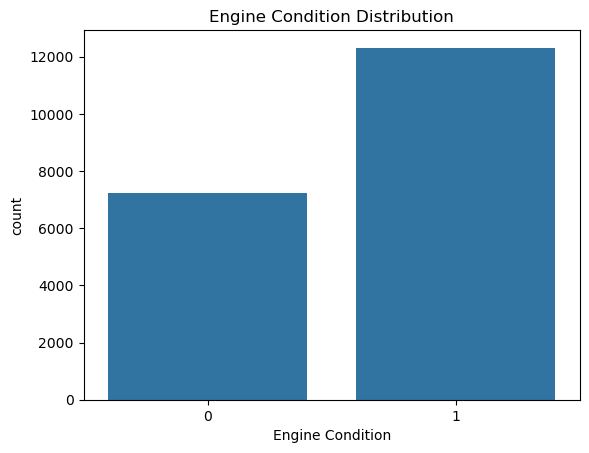

In [21]:
sns.countplot(x="Engine Condition", data=raw_df)
plt.title("Engine Condition Distribution")
plt.show()

There is a slight class imbalance towards the healthy engines.

Let's check for outliers and distribution of numerical features.

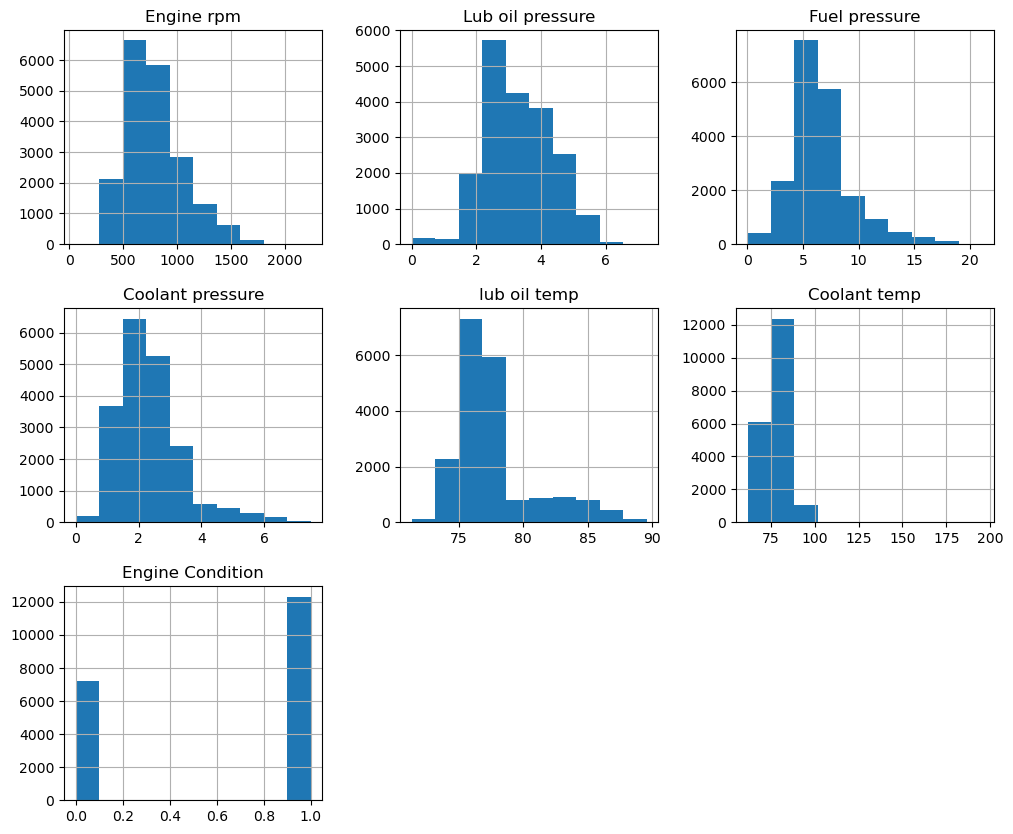

In [20]:
raw_df.hist(figsize=(12,10))
plt.show()

##### **Engine RPM:**<br>
* Most values are concentrated roughly between 500 – 1200 rpm

* Slight right skew (few high rpm values up to ~2000)

* No extreme abnormal spikes

* Engine operates mostly in a normal operating band. High RPM values may correspond to high load or stress conditions.

##### **Lubrication Oil Pressure**<br>
* Most values between 2 – 4

* Slight right skew

* Few low-pressure values near 0

* Low oil pressure can be a strong indicator of engine failure. You should later check oil pressure vs Engine Condition using boxplots

##### **Fuel Pressure**<br>
* Concentrated around 4 – 8

* Some extreme values up to 20

* Fue*l pressure shows some outliers.

##### **Coolant Pressure**<br>
* Most values between 1 – 4

* Slight skew

* Some higher outliers

* Coolant pressure distribution seems reasonable. Higher coolant pressure might correlate with overheating events.

##### **Lub Oil Temperature**<br>
* Concentrated around 75 – 82°C

* Slight right skew

* Some values near 90°C

* Engine oil temperature appears stable for most samples. High oil temperatures could be associated with failure events.

##### **Coolant Temperature**<br>
* Most values between 70 – 100°C

* Some extreme outliers up to 200°C

* 200°C is unusually high for coolant temperature.

##### **Engine Condition (Target Variable)**<br>
Two bars:

* 0 _No Failure

* 1 _Failure

* 1 appears larger than 0 but not extremely imbalanced

* Dataset seems moderately imbalanced.

Checking for correlation between columns

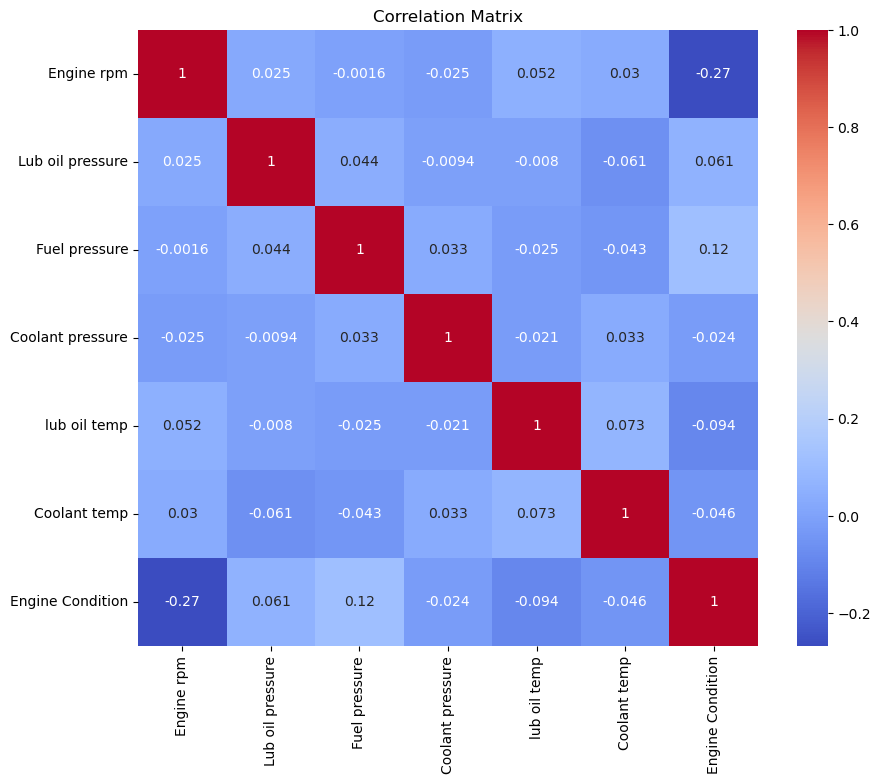

In [22]:
plt.figure(figsize=(10,8))
sns.heatmap(raw_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

The correlation matrix shows generally weak linear relationships between the features and **Engine Condition**. The strongest relationship is a moderate negative correlation with **Engine rpm** (-0.268), suggesting RPM has the most noticeable linear influence on engine condition. **Fuel pressure** shows a small positive correlation (0.116), while the remaining variables have very weak correlations close to zero, indicating limited linear predictive power individually. Additionally, feature-to-feature correlations are low, meaning there is little multicollinearity in the dataset. Overall, the target does not appear to be strongly linearly driven by any single variable, suggesting that non-linear modeling or feature engineering may be important.


<br>

## **3. Data Preparation**<hr>

Here we prepare data for training

In [24]:
X_train = train_df.drop(columns=["engine_condition"])
y_train = train_df["engine_condition"]

X_test = test_df.drop(columns=["engine_condition"])
y_test = test_df["engine_condition"]

<br>

## **4. Modelling**<hr> 